In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import arange
from actuariat_python.plots import plot_population_pyramid
from matplotlib import pyplot as plt
from numpy import arange

In [2]:
RHO_tr = pd.read_excel (r'.\Factice_SAS_Sal.xlsx',index=None)

In [3]:
RHO_tr

,S10.G00.00.001,S10.G00.00.002,S10.G00.00.003,S10.G00.00.004,S10.G00.00.005,S10.G00.00.006,S10.G00.00.007,S10.G00.00.008,S10.G00.01.001,S10.G00.01.002,...,S21.G00.20.001,S21.G00.20.002,S21.G00.20.003,S21.G00.20.004,S21.G00.20.005,S21.G00.20.006,S21.G00.20.007,S21.G00.30.005,S21.G00.30.006,age
0,FACTICE_log_paie,FACTICE_EDITEUR,*************,0,1,P03V01,1,1,3572322545,657357,...,585670015,49755453000044,*************,FR76qergqerg6654454,2786.00,2017-05-01,2017-05-31,F,1982-08-15,38
1,FACTICE_log_paie,FACTICE_EDITEUR,*************,1,56,P06V01,74,55,3390659585,778868,...,260219219,6.96B+79,*************,FRs9-9107750L,7606.19,1986-05-16,1997-07-07,H,1983-01-22,37
2,FACTICE_log_paie,FACTICE_EDITEUR,*************,4,20,P03V00,67,28,6123165100,513694,...,614042426,4.69l+45,*************,FRf1-207730t,2533.54,1980-09-15,2002-04-04,H,1980-03-28,40
3,FACTICE_log_paie,FACTICE_EDITEUR,*************,0,15,P03V05,54,70,9933619701,145865,...,809974591,2.87K+21,*************,FRB8-6291261a,3325.79,2011-11-05,2011-08-03,F,1965-04-30,55
4,FACTICE_log_paie,FACTICE_EDITEUR,*************,8,99,P09V06,21,80,2984243118,526252,...,700071991,6.53P+78,*************,FRe2-238259y,9195.47,1988-07-21,1986-10-31,F,1962-03-28,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,FACTICE_log_paie,FACTICE_EDITEUR,*************,1,46,P00V05,71,56,7514639713,280811,...,443967742,8.35P+91,*************,FRe6-561239S,7912.43,1996-11-26,2004-10-12,H,1980-09-23,40
996,FACTICE_log_paie,FACTICE_EDITEUR,*************,1,21,P05V00,35,6,3154997606,532394,...,434356406,7.0u+76,*************,FRZ4-8912201I,8139.33,1973-09-18,1989-07-30,F,1977-07-14,43
997,FACTICE_log_paie,FACTICE_EDITEUR,*************,7,34,P09V04,50,56,4407655817,149354,...,541889020,4.44m+92,*************,FRd3-6313002g,3517.60,1997-07-12,2002-09-23,H,1966-03-31,54
998,FACTICE_log_paie,FACTICE_EDITEUR,*************,6,90,P09V00,12,20,7434067754,797386,...,467583310,1.87Q+67,*************,FRx7-3599340B,7948.83,2005-01-27,1978-01-18,H,1965-07-17,55


In [51]:
now = pd.Timestamp('now')
RHO_tr['age'] = [int(int((now-i).days)/365) for i in RHO_tr['S21.G00.30.006']]

In [77]:
from actuariat_python.plots import plot_population_pyramid
plot_population_pyramid(age_hommes, age_femmes, figsize=(8, 8))

484

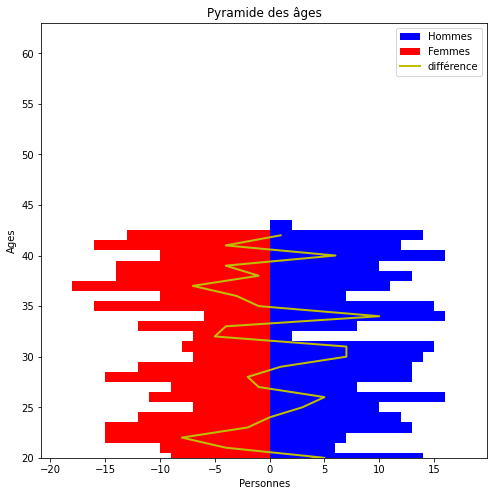

In [78]:
from matplotlib import pyplot as plt
from numpy import arange
import matplotlib.ticker as mticker

femmes = RHO_tr['S21.G00.30.005'][RHO_tr['S21.G00.30.005']=='F']
hommes = RHO_tr['S21.G00.30.005'][RHO_tr['S21.G00.30.005']=='H']
age_femmes = RHO_tr['age'][RHO_tr['S21.G00.30.005']=='F']
age_hommes = RHO_tr['age'][RHO_tr['S21.G00.30.005']=='H']

# pyramid_df = RHO_tr.filter(['age','S21.G00.30.005'], axis=1)
pyramid_df = RHO_tr[["age","S21.G00.30.005"]]


# bins = [20, 30, 40, 50, 60,]
# labels = ['20-29', '30-39', '40-49', '50-59', '60+']
# pyramid_df['agerange'] = pd.cut(pyramid_df.age, bins, labels = labels,include_lowest = True)


Y = np.array(range(RHO_tr.shape[0]))
ax.set_yticks(Y)
ax.set_yticklabels(labels)

count_age_F = pyramid_df[pyramid_df['S21.G00.30.005'] == 'F'].groupby(["age"]).count()['S21.G00.30.005']
count_age_H = pyramid_df[pyramid_df['S21.G00.30.005'] == 'H'].groupby(["age"]).count()['S21.G00.30.005']
somme_ages = count_age_H - count_age_F

fig, ax = plt.subplots(figsize=(8,8))
ValH = ax.barh(arange(len(count_age_H)), count_age_H, 1.0, label="Hommes",
               color='b', linewidth=0, align='center')
ValF = ax.barh(arange(len(count_age_F)), -count_age_F, 1.0, label="Femmes",
               color='r', linewidth=0, align='center')
diff, = ax.plot(somme_ages, arange(len(somme_ages)), 'y', linewidth=2)

ax.set_title("Pyramide des âges")
ax.set_ylabel("Ages")
ax.set_xlabel("Personnes")
ax.set_ylim([20, 63])
ax.legend((ValH, ValF, diff), ('Hommes', 'Femmes', 'différence'));